In [5]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score

In [6]:
df = pd.read_csv("okcupid-stem.csv")
df

C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,?,non_stem,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70,80000,non_stem,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,23,thin,vegetarian,socially,?,working on college/university,white,71,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,?,m,pisces,no,"english, german (poorly)",single
3,29,athletic,?,socially,never,graduated from college/university,"asian, black, other",66,?,non_stem,...,"san francisco, california",?,straight,likes dogs and likes cats,?,m,aquarius,no,english,single
4,29,average,mostly anything,socially,?,graduated from college/university,white,67,?,stem,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50784,59,?,?,socially,never,graduated from college/university,?,62,?,non_stem,...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
50785,24,fit,mostly anything,often,sometimes,working on college/university,"white, other",72,?,non_stem,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
50786,42,average,mostly anything,not at all,never,graduated from masters program,asian,71,100000,non_stem,...,"south san francisco, california",doesn&rsquo;t have kids,straight,?,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
50787,27,athletic,mostly anything,socially,often,working on college/university,"asian, black",73,?,non_stem,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single


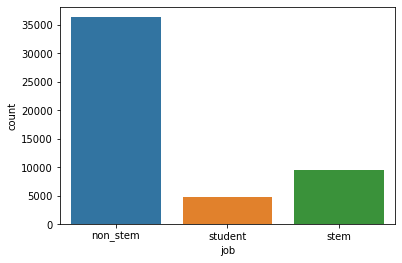

In [7]:
sns.countplot(x = df["job"]);

**Mudar tipos pra categor com hot encoding**

**Sem balanceamento e Sem GS**

In [66]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    results = pd.DataFrame(columns=["ACC","F1"])
    model.fit(X_train, y_train)
    new_row = {"ACC":balanced_accuracy_score(y_test, model.predict(X_test)),"F1":f1_score(y_test, model.predict(X_test), average='weighted') }




    return new_row

In [67]:

kf = StratifiedKFold(n_splits=2)
X = normalized_df.drop('job', axis=1).values
y = normalized_df['job'].values
kf.get_n_splits(X,y)

metrics = ["ACC","F1"]

df_knn = pd.DataFrame(columns=metrics)
df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_np = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    model = KNeighborsClassifier(n_neighbors=7)
    df_knn =df_knn.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
     
    model = DecisionTreeClassifier()
    df_tree = df_tree.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
    
    
    model = MLPClassifier(hidden_layer_sizes=(64,64,64), 
                    activation='tanh', solver='sgd',
                    alpha=0.0001,
                    learning_rate='adaptive', max_iter=1000)
    df_mlp  = df_mlp.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
    
    
    model = GaussianNB()
    df_np = df_np.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    
    
    
    model = LogisticRegression(solver='liblinear')
    df_reg_log = df_reg_log.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    

In [68]:
df_knn

,ACC,F1
0,0.979325,0.979385
1,0.980635,0.980349


In [69]:
df_tree

,ACC,F1
0,0.943033,0.942992
1,0.925315,0.925723


In [70]:
df_mlp

,ACC,F1
0,0.978626,0.978703
1,0.966470,0.965977


In [71]:
df_np

,ACC,F1
0,0.840503,0.835536
1,0.845110,0.842325


In [75]:
df_reg_log

,ACC,F1
0,0.914481,0.914677
1,0.890361,0.889264
